# 1. PROPHET

19:16:07 - cmdstanpy - INFO - Chain [1] start processing
19:16:07 - cmdstanpy - INFO - Chain [1] done processing


=== Previsão ===
           ds      yhat  yhat_lower  yhat_upper
0  2025-06-02  7.711807    7.709511    7.714154
1  2025-06-03  7.664485    7.661884    7.666648
2  2025-06-04  7.641325    7.638983    7.643692
3  2025-06-05  7.599991    7.597711    7.602307
4  2025-06-06  7.568865    7.566574    7.571101
5  2025-06-09  7.560551    7.558252    7.562877
6  2025-06-10  7.502391    7.500158    7.504904
7  2025-06-11  7.505016    7.502611    7.507401
8  2025-06-12  7.532469    7.530074    7.534988
9  2025-06-13  7.559922    7.557521    7.562244
10 2025-06-16  7.642280    7.622691    7.660086
11 2025-06-17  7.669733    7.606434    7.725584
12 2025-06-18  7.697186    7.580604    7.808815
13 2025-06-19  7.724639    7.531295    7.903463
14 2025-06-20  7.752092    7.486037    8.006072


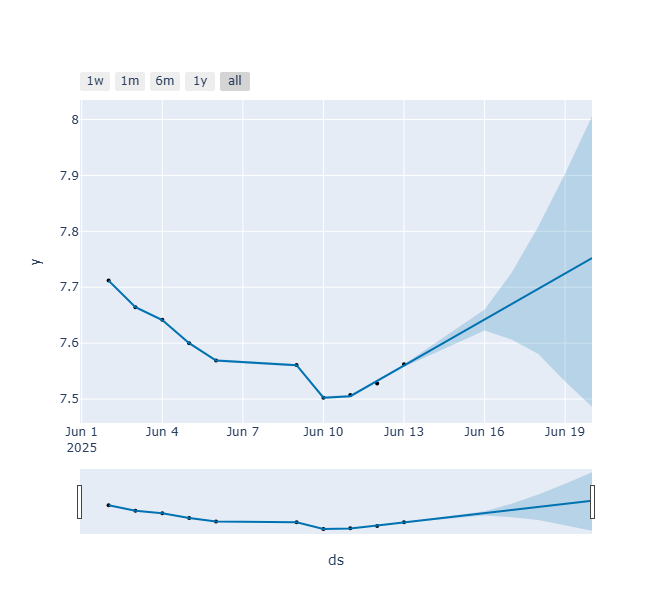

In [3]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Você pode substituir por dados reais em um CSV
data = {
    'ds': pd.date_range(start='2025-06-01', periods=10, freq='B'),  # 10 dias
    'y': [7.7119, 7.6642, 7.6417, 7.5998, 7.5688, 7.5608, 7.5022, 7.5073, 7.5278, 7.5623]  # valores de exemplo
}
df = pd.DataFrame(data)

# Instanciar o modelo Prophet
model = Prophet()

# Treinar (fit) o modelo
model.fit(df)

# Criar dataframe futuro (n dias a frente)
future = model.make_future_dataframe(periods=5, freq='B')  # 5 dias úteis a mais
forecast = model.predict(future)

print("=== Previsão ===")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

# Visualizar
from prophet.plot import plot_plotly
fig = plot_plotly(model, forecast)
fig.show()

# 2. SARIMA

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import warnings

In [ ]:
##
# Gera um array contendo 24 datas
##
#dates = pd.date_range('2022-01-01', periods=12, freq='MS')  # 12 meses
dates = pd.date_range('2022-01-01', periods=24, freq='MS')  # 24 meses

##
# Gera um array com 24 valores
##
#values = [100, 120, 115, 130, 140, 200, 180, 190, 170, 165, 210, 220,
#          105, 125, 110, 135, 145, 205, 185, 195, 175, 160, 215, 225]
values = [100 + i * 2 + 20 * (i % 12 == 0) for i in range(24)]


##
# Cria um novo dataset
##
df = pd.DataFrame({'date': dates, 'value': values})
df.set_index('date', inplace=True)

# Definindo frequência explicitamente (opcional, mas evita o aviso)
#df.index = df.index.asfreq('MS')



print(f"\n\nInformações sobre o dataset \n\n\t")
df.info()

print(f"\n\nPrimeiras linhas do dataset\n\t")
df.head(5)